In [115]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('flight.csv')
pd.set_option('display.max_columns', None)
df.head()


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-19,WN,WN,WN,5460,WN,N756SA,5460,13198,MCI,"Kansas City, MO",10423,AUS,"Austin, TX",1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,0.0,NaN,0.0,N,110.0,105.0,89.0,1.0,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-07,F9,F9,F9,1673,F9,N705FR,1673,14100,PHL,"Philadelphia, PA",13204,MCO,"Orlando, FL",1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,0.0,NaN,0.0,N,160.0,163.0,130.0,1.0,861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,AA,AA_CODESHARE,AA,4365,AX,N611AE,4365,11278,DCA,"Washington, DC",10868,CAE,"Columbia, SC",1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,0.0,NaN,0.0,N,100.0,87.0,71.0,1.0,408.0,0.0,0.0,0.0,0.0,53.0,NaN,NaN,NaN,NaN
3,2018-01-07,UA,UA_CODESHARE,UA,4410,EV,N14573,4410,14783,SGF,"Springfield, MO",12266,IAH,"Houston, TX",1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,0.0,NaN,0.0,N,117.0,107.0,91.0,1.0,513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-08,DL,DL,DL,2877,DL,N340DN,2877,14869,SLC,"Salt Lake City, UT",14107,PHX,"Phoenix, AZ",820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,0.0,NaN,0.0,N,101.0,93.0,69.0,1.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# def format_hour(x):   #format date
#     if pd.isnull(x):
#         return np.nan
#     else:
#         if x == 2400: x = 0
#         x = "{0:04d}".format(int(x))
#         hour = datetime.time(int(x[0:2]), int(x[2:4]))
#         return hour

def get_stat(group): #function to get stats - x.describe() does not work well 
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [118]:
data = [                   #features I want & will be working with later 
    'fl_date', 'mkt_carrier','origin','dest','crs_dep_time','dep_time','dep_delay','taxi_out',
    'wheels_off','wheels_on','taxi_in','crs_arr_time','arr_time','arr_delay','crs_elapsed_time',
    'actual_elapsed_time','air_time','distance'
]

In [119]:
df = df[data].dropna()

In [120]:
df

,fl_date,mkt_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2019-05-19,WN,MCI,AUS,1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,110.0,105.0,89.0,650.0
1,2018-04-07,F9,PHL,MCO,1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,160.0,163.0,130.0,861.0
2,2018-01-01,AA,DCA,CAE,1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,100.0,87.0,71.0,408.0
3,2018-01-07,UA,SGF,IAH,1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,117.0,107.0,91.0,513.0
4,2019-05-08,DL,SLC,PHX,820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,101.0,93.0,69.0,507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-03-14,WN,TUS,MDW,710,706.0,-4.0,8.0,714.0,1210.0,5.0,1225,1215.0,-10.0,195.0,189.0,176.0,1440.0
99996,2018-02-28,WN,ALB,MCO,1440,1446.0,6.0,12.0,1458.0,1720.0,5.0,1745,1725.0,-20.0,185.0,159.0,142.0,1073.0
99997,2018-03-17,AA,LAS,CLT,2300,2343.0,43.0,11.0,2354.0,620.0,3.0,606,623.0,17.0,246.0,220.0,206.0,1916.0
99998,2018-09-09,DL,ATL,LAX,2008,2006.0,-2.0,12.0,2018.0,2132.0,8.0,2150,2140.0,-10.0,282.0,274.0,254.0,1947.0


In [121]:
# df['dep_time'] = df['dep_time'].apply(format_hour)    #format HHMM
# df['crs_dep_time'] = df['crs_dep_time'].apply(format_hour)
# df['arr_time'] = df['arr_time'].apply(format_hour)
# df['crs_arr_time'] = df['crs_arr_time'].apply(format_hour)
# df['wheels_off'] = df['wheels_off'].apply(format_hour)
# df['wheels_on'] = df['wheels_on'].apply(format_hour)

In [122]:
date = df['fl_date'].str.split(pat = '-', expand=True)  #format split Year Month Day
df[['Year','Month','Day']] = date
df.drop(columns = 'fl_date')

,mkt_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,Year,Month,Day
0,WN,MCI,AUS,1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,110.0,105.0,89.0,650.0,2019,05,19
1,F9,PHL,MCO,1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,160.0,163.0,130.0,861.0,2018,04,07
2,AA,DCA,CAE,1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,100.0,87.0,71.0,408.0,2018,01,01
3,UA,SGF,IAH,1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,117.0,107.0,91.0,513.0,2018,01,07
4,DL,SLC,PHX,820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,101.0,93.0,69.0,507.0,2019,05,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,WN,TUS,MDW,710,706.0,-4.0,8.0,714.0,1210.0,5.0,1225,1215.0,-10.0,195.0,189.0,176.0,1440.0,2018,03,14
99996,WN,ALB,MCO,1440,1446.0,6.0,12.0,1458.0,1720.0,5.0,1745,1725.0,-20.0,185.0,159.0,142.0,1073.0,2018,02,28
99997,AA,LAS,CLT,2300,2343.0,43.0,11.0,2354.0,620.0,3.0,606,623.0,17.0,246.0,220.0,206.0,1916.0,2018,03,17
99998,DL,ATL,LAX,2008,2006.0,-2.0,12.0,2018.0,2132.0,8.0,2150,2140.0,-10.0,282.0,274.0,254.0,1947.0,2018,09,09


In [123]:
df['taxi_time'] = df['taxi_out'] - df['taxi_in']   #taxi time vs time of day is departure time
tod = lambda x:((0,1)[x >= 900],2)[x >= 1800]
df['time_of_day'] = df['dep_time'].apply(tod)

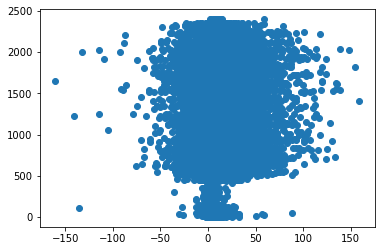

In [124]:
#most taxi time is between -50 to 50 min 
sca_gra = plt.scatter('taxi_time', 'dep_time', data=df)


In [125]:
#df.loc[df['time_of_day']==0].count()
#22939/98006 | 23.4%
morning_time_data = df.loc[df['time_of_day']==0]
morning_time_data['taxi_time'].describe()
#mean 9.27min
#max 133min
#min -136min

count    22939.000000
mean         9.272462
std         11.301975
min       -136.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        133.000000
Name: taxi_time, dtype: float64

In [126]:
#df.loc[df['time_of_day']==1].count()
#52513/98006 | 53.5%
day_time_data = df.loc[df['time_of_day']==1]
day_time_data['taxi_time'].describe()
#mean 9.7min
#max 159min
#min -161min


count    52513.000000
mean         9.710148
std         11.501422
min       -161.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        159.000000
Name: taxi_time, dtype: float64

In [127]:
#df.loc[df['time_of_day']==2].count()
#22554/98006 | 23.0%
night_time_data = df.loc[df['time_of_day']==2]
night_time_data['taxi_time'].describe()
#mean 10.35min
#max 154min
#min -133min

count    22554.000000
mean        10.353507
std         12.150854
min       -133.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        154.000000
Name: taxi_time, dtype: float64

In [128]:
#averageDelayTimeByAirline
carrier = 'AA' #Finding AA's delay stats in different airports 
check_airports = df[(df['mkt_carrier'] == carrier)]['arr_delay'].groupby(
                         df['origin']).apply(get_stat).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports.head()

,min,max,count,mean
origin,,,,
DFW,-36.0,991.0,3117.0,8.999358
CLT,-47.0,799.0,2797.0,6.981766
ORD,-43.0,856.0,1883.0,11.648433
PHL,-48.0,326.0,1529.0,6.370177
PHX,-57.0,879.0,1112.0,4.931655


In [129]:
us_airline = df['arr_delay'].groupby(df['mkt_carrier']).apply(get_stat).unstack()
us_airline = us_airline.sort_values('count')
us_airline

,min,max,count,mean
mkt_carrier,,,,
VX,-45.0,196.0,106.0,11.377358
HA,-52.0,588.0,1086.0,1.148250
G4,-52.0,1442.0,1272.0,10.136792
F9,-61.0,613.0,1600.0,9.926875
NK,-49.0,998.0,2377.0,5.176273
B6,-70.0,826.0,3634.0,12.346725
AS,-80.0,526.0,5202.0,0.345636
WN,-57.0,437.0,16646.0,3.205575
UA,-63.0,1336.0,19019.0,8.736684


In [130]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['delay_level'] = df['arr_delay'].apply(delay_type)

In [133]:
#Delay Counts by airport
# gra = sns.countplot(y = 'mkt_carrier', hue = 'delay_level',data = df)
# gra.legend(title='Delay Level', loc='lower right', labels=['on time(t < 5min)', 'small delay(5 < t < 45min)','large delay(t > 45min)'])
# gra.set_title('Delay Counts vs Airline')
# gra.set_ylabel('Airline')
# gra.set_xlabel('Delay Counts')

In [132]:
df[['mkt_carrier','arr_delay']].groupby(['mkt_carrier'])['arr_delay'].mean().sort_values(ascending=False)
us_airport = df['arr_delay'].groupby(df['origin']).apply(get_stat).unstack()
us_airport = us_airport.sort_values('count')
us_airport


,min,max,count,mean
origin,,,,
PPG,7.0,7.0,1.0,7.000000
BKG,16.0,16.0,1.0,16.000000
OWB,4.0,4.0,1.0,4.000000
OGD,-21.0,-21.0,1.0,-21.000000
GST,-2.0,-2.0,1.0,-2.000000
...,...,...,...,...
LAX,-53.0,851.0,3164.0,1.661504
DEN,-43.0,1018.0,3414.0,8.732279
DFW,-40.0,991.0,3563.0,8.888577


In [181]:
avg_delay_origin = df[['origin','arr_delay']].groupby(['origin'])['arr_delay'].mean().sort_values()
df['origin_delay'] = df['origin']
df['origin_delay'] = df['origin_delay'].replace(avg_delay_origin)
df['origin_delay']
#avg_arr_delay_at_origin

0         0.813154
1         5.809959
2         5.816488
3        11.879032
4         1.295573
           ...    
99995     0.395918
99996     2.696429
99997     3.668244
99998     2.446831
99999     6.482493
Name: origin_delay, Length: 98006, dtype: float64

In [159]:
delay_by_month = df[['Month','arr_delay']].groupby(['Month'])['arr_delay'].mean().sort_values()
df['delay_by_month']= df['Month']
df['delay_by_month'] = df['delay_by_month'].replace(delay_by_month)
df['delay_by_month']


0        6.123189
1        4.164554
2        3.394647
3        3.394647
4        6.123189
           ...   
99995    2.197540
99996    6.120882
99997    2.197540
99998    1.452672
99999    8.608324
Name: delay_by_month, Length: 98006, dtype: float64

In [161]:
delay_by_day = df[['Day','arr_delay']].groupby(['Day'])['arr_delay'].mean().sort_values()
df['delay_by_day']= df['Day']
df['delay_by_day'] = df['delay_by_day'].replace(delay_by_day)
df['delay_by_day']

0        6.025008
1        4.668227
2        4.816586
3        4.668227
4        6.845741
           ...   
99995    5.106019
99996    4.031586
99997    5.666029
99998    6.438135
99999    3.932198
Name: delay_by_day, Length: 98006, dtype: float64

In [162]:
df

,fl_date,mkt_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,Year,Month,Day,taxi_time,time_of_day,delay_level,origindelays,origin_delays,origin_delay_airport,origin_delay_aiport,delay_by_month,delay_by_day
0,2019-05-19,WN,MCI,AUS,1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,110.0,105.0,89.0,650.0,2019,05,19,6.0,1,0,0.813154,0.813154,MCI,0.813154,6.123189,6.025008
1,2018-04-07,F9,PHL,MCO,1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,160.0,163.0,130.0,861.0,2018,04,07,-5.0,1,0,5.809959,5.809959,PHL,5.809959,4.164554,4.668227
2,2018-01-01,AA,DCA,CAE,1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,100.0,87.0,71.0,408.0,2018,01,01,10.0,1,2,5.816488,5.816488,DCA,5.816488,3.394647,4.816586
3,2018-01-07,UA,SGF,IAH,1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,117.0,107.0,91.0,513.0,2018,01,07,4.0,1,0,11.879032,11.879032,SGF,11.879032,3.394647,4.668227
4,2019-05-08,DL,SLC,PHX,820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,101.0,93.0,69.0,507.0,2019,05,08,14.0,0,0,1.295573,1.295573,SLC,1.295573,6.123189,6.845741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-03-14,WN,TUS,MDW,710,706.0,-4.0,8.0,714.0,1210.0,5.0,1225,1215.0,-10.0,195.0,189.0,176.0,1440.0,2018,03,14,3.0,0,0,0.395918,0.395918,TUS,0.395918,2.197540,5.106019
99996,2018-02-28,WN,ALB,MCO,1440,1446.0,6.0,12.0,1458.0,1720.0,5.0,1745,1725.0,-20.0,185.0,159.0,142.0,1073.0,2018,02,28,7.0,1,0,2.696429,2.696429,ALB,2.696429,6.120882,4.031586
99997,2018-03-17,AA,LAS,CLT,2300,2343.0,43.0,11.0,2354.0,620.0,3.0,606,623.0,17.0,246.0,220.0,206.0,1916.0,2018,03,17,8.0,2,1,3.668244,3.668244,LAS,3.668244,2.197540,5.666029
99998,2018-09-09,DL,ATL,LAX,2008,2006.0,-2.0,12.0,2018.0,2132.0,8.0,2150,2140.0,-10.0,282.0,274.0,254.0,1947.0,2018,09,09,4.0,2,0,2.446831,2.446831,ATL,2.446831,1.452672,6.438135


In [180]:
avg_delay_dest = df[['dest','arr_delay']].groupby(['dest'])['arr_delay'].mean().sort_values()
df['dest_delay'] = df['dest']
df['dest_delay'] = df['dest_delay'].replace(avg_delay_dest)
df['dest_delay']
#avg_arr_delay_at_dest

0        1.996324
1        7.487434
2        8.679389
3        8.660893
4        5.465170
           ...   
99995    2.467472
99996    7.487434
99997    2.815619
99998    2.834677
99999    5.905660
Name: dest_delay, Length: 98006, dtype: float64

In [166]:
#df['taxi_time'] = df['taxi_out'] - df['taxi_in']

In [182]:
avg_delay_taxi = df[['taxi_time','arr_delay']].groupby(['taxi_time'])['arr_delay'].mean().sort_values()
df['taxi_delay'] = df['taxi_time']
df['taxi_delay'] = df['taxi_delay'].replace(avg_delay_taxi)
df['taxi_delay']
#avg_arr_delay_a_dest

0        0.114125
1        7.870968
2        1.422646
3        0.248370
4        4.071194
           ...   
99995   -0.639161
99996   -0.304048
99997    1.099578
99998    0.248370
99999    1.339869
Name: taxi_delay, Length: 98006, dtype: float64

In [169]:
df

,fl_date,mkt_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,Year,Month,Day,taxi_time,time_of_day,delay_level,origindelays,origin_delays,origin_delay_airport,origin_delay_aiport,delay_by_month,delay_by_day,dest_delay_airport,dest_delay_aiport,taxi_delay
0,2019-05-19,WN,MCI,AUS,1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,110.0,105.0,89.0,650.0,2019,05,19,6.0,1,0,0.813154,0.813154,MCI,0.813154,6.123189,6.025008,AUS,1.996324,0.114125
1,2018-04-07,F9,PHL,MCO,1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,160.0,163.0,130.0,861.0,2018,04,07,-5.0,1,0,5.809959,5.809959,PHL,5.809959,4.164554,4.668227,MCO,7.487434,7.870968
2,2018-01-01,AA,DCA,CAE,1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,100.0,87.0,71.0,408.0,2018,01,01,10.0,1,2,5.816488,5.816488,DCA,5.816488,3.394647,4.816586,CAE,8.679389,1.422646
3,2018-01-07,UA,SGF,IAH,1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,117.0,107.0,91.0,513.0,2018,01,07,4.0,1,0,11.879032,11.879032,SGF,11.879032,3.394647,4.668227,IAH,8.660893,0.248370
4,2019-05-08,DL,SLC,PHX,820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,101.0,93.0,69.0,507.0,2019,05,08,14.0,0,0,1.295573,1.295573,SLC,1.295573,6.123189,6.845741,PHX,5.465170,4.071194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-03-14,WN,TUS,MDW,710,706.0,-4.0,8.0,714.0,1210.0,5.0,1225,1215.0,-10.0,195.0,189.0,176.0,1440.0,2018,03,14,3.0,0,0,0.395918,0.395918,TUS,0.395918,2.197540,5.106019,MDW,2.467472,-0.639161
99996,2018-02-28,WN,ALB,MCO,1440,1446.0,6.0,12.0,1458.0,1720.0,5.0,1745,1725.0,-20.0,185.0,159.0,142.0,1073.0,2018,02,28,7.0,1,0,2.696429,2.696429,ALB,2.696429,6.120882,4.031586,MCO,7.487434,-0.304048
99997,2018-03-17,AA,LAS,CLT,2300,2343.0,43.0,11.0,2354.0,620.0,3.0,606,623.0,17.0,246.0,220.0,206.0,1916.0,2018,03,17,8.0,2,1,3.668244,3.668244,LAS,3.668244,2.197540,5.666029,CLT,2.815619,1.099578
99998,2018-09-09,DL,ATL,LAX,2008,2006.0,-2.0,12.0,2018.0,2132.0,8.0,2150,2140.0,-10.0,282.0,274.0,254.0,1947.0,2018,09,09,4.0,2,0,2.446831,2.446831,ATL,2.446831,1.452672,6.438135,LAX,2.834677,0.248370


In [188]:
feature_eng = ['fl_date','origin','dest','distance','taxi_time','actual_elapsed_time','origin_delay_airport','dest_delay_airport','arr_delay','origin_delays','origin_delay','dest_delay','delay_by_month','delay_by_day']

In [189]:
fe = df[feature_eng] #myfeature eng

In [190]:
fe_copy = fe.copy()

In [191]:
fe.to_csv('feature_eng.csv')

In [192]:
fe

,fl_date,origin,dest,distance,taxi_time,actual_elapsed_time,origin_delay_airport,dest_delay_airport,arr_delay,origin_delays,origin_delay,dest_delay,delay_by_month,delay_by_day
0,2019-05-19,MCI,AUS,650.0,6.0,105.0,MCI,AUS,-9.0,0.813154,0.813154,1.996324,6.123189,6.025008
1,2018-04-07,PHL,MCO,861.0,-5.0,163.0,PHL,MCO,-7.0,5.809959,5.809959,7.487434,4.164554,4.668227
2,2018-01-01,DCA,CAE,408.0,10.0,87.0,DCA,CAE,53.0,5.816488,5.816488,8.679389,3.394647,4.816586
3,2018-01-07,SGF,IAH,513.0,4.0,107.0,SGF,IAH,1.0,11.879032,11.879032,8.660893,3.394647,4.668227
4,2019-05-08,SLC,PHX,507.0,14.0,93.0,SLC,PHX,-12.0,1.295573,1.295573,5.465170,6.123189,6.845741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-03-14,TUS,MDW,1440.0,3.0,189.0,TUS,MDW,-10.0,0.395918,0.395918,2.467472,2.197540,5.106019
99996,2018-02-28,ALB,MCO,1073.0,7.0,159.0,ALB,MCO,-20.0,2.696429,2.696429,7.487434,6.120882,4.031586
99997,2018-03-17,LAS,CLT,1916.0,8.0,220.0,LAS,CLT,17.0,3.668244,3.668244,2.815619,2.197540,5.666029
99998,2018-09-09,ATL,LAX,1947.0,4.0,274.0,ATL,LAX,-10.0,2.446831,2.446831,2.834677,1.452672,6.438135
